# EDA :

In [3]:
import pandas as pd
import math
from datetime import datetime, timedelta

In [4]:
df_raw = pd.read_csv('dpi_fraud_flag_cgi.csv')

In [5]:
df_raw.head(3)

,msisdn,event_date,cgi,rat,profile_name,quota_name,protocol,domain,ip_destination,accessed_category,accessed_app,kpi_data_volume_total_bytes,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,flag
0,6281210077714,2020-12-01,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,3633776001,0,430,942,2348290,1665496,3516935,1
1,6281210077714,2020-12-01,510100148743022,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,7242484799,0,3148,3555,4649069,3960297,6907476,1
2,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,HTTP,13034645.0,3185885366,0,1895,1323,2509610,835718,3072001,1


In [6]:
df_raw.columns.tolist()

['msisdn',
 'event_date',
 'cgi',
 'rat',
 'profile_name',
 'quota_name',
 'protocol',
 'domain',
 'ip_destination',
 'accessed_category',
 'accessed_app',
 'kpi_data_volume_total_bytes',
 'total_volume_bcp',
 'hits_tether',
 'rxmit_packets_in',
 'rxmit_packets_out',
 'packets_in',
 'packets_out',
 'bucket_usage',
 'flag']

In [7]:
df_raw.isnull().sum()

msisdn                             0
event_date                         0
cgi                                0
rat                                0
profile_name                       0
quota_name                         0
protocol                           0
domain                         24431
ip_destination                 20000
accessed_category                  0
accessed_app                       0
kpi_data_volume_total_bytes    20000
total_volume_bcp                   0
hits_tether                        0
rxmit_packets_in                   0
rxmit_packets_out                  0
packets_in                         0
packets_out                        0
bucket_usage                       0
flag                               0
dtype: int64

In [8]:
(df_raw.corr()*100)['flag']

msisdn                          19.097403
cgi                              9.215979
kpi_data_volume_total_bytes           NaN
total_volume_bcp                15.086714
hits_tether                    -10.785175
rxmit_packets_in                 5.757597
rxmit_packets_out                3.465614
packets_in                      14.766005
packets_out                      7.221634
bucket_usage                    18.377777
flag                           100.000000
Name: flag, dtype: float64

In [9]:
df_raw.accessed_category.unique().tolist()

['Web',
 'Communications',
 'Attack',
 'Education',
 'Proxy',
 'CDN',
 'Music',
 'unclassified',
 'Games',
 'Images',
 'GoogleServices',
 'Enterprise',
 'ApplicationStore',
 'Technology',
 'Productivity',
 'VPN',
 'Net',
 'non-established',
 'Remote',
 'Mail',
 'Finance',
 'News',
 'Media',
 'DeviceServices',
 'Telco',
 'CloudServices',
 'P2P',
 'CloudStorage',
 'Lifestyle',
 'Ads',
 'WebApps',
 'FileSharing',
 'Sports',
 'Backup',
 'AppleServices',
 'eCommerce',
 'Update',
 'Automotive']

In [10]:
df_raw.accessed_app.unique().tolist()

['HTTP',
 'LINE',
 'SSHProxyFraud',
 'WhatsApp',
 'GoogleClassroom',
 'ProxyAvoidanceSites',
 'HostingSites',
 'Deezer',
 'SSL',
 'unclassified',
 'Spotify',
 'MessagingSites',
 'miHoYo',
 'MobileLegends',
 'GooglePhotos',
 'EpicGames',
 'Zoom',
 'GoogleServices',
 'Joox',
 'MSSharepoint',
 'LINEApps',
 'Akamai',
 'Evozi',
 'GamesSites',
 'ReferenceSites',
 'Kemdikbud',
 'IPsec',
 'QUIC',
 'GoogleHangouts',
 'Telegram',
 'PUBGMobile',
 'non-established',
 'IlmupediaKampus',
 'CollaborationSites',
 'SSH',
 'IMAP',
 'GooglePlayStore',
 'Highwinds',
 'Steam',
 'ThinkHuge',
 'ExpressVPN',
 'SOCKS',
 'AmazonCloudfront',
 'LINETODAY',
 'AdultSites',
 'MIUIServices',
 'TelcoSites',
 'CloudServicesSites',
 'STUN',
 '1.1.1.1',
 'OpenVPN',
 'CloudX',
 'NarutoXBoruto',
 'BitTorrent',
 'iCloud',
 'EducationSites',
 'MusicSites',
 'GtArcade',
 'GoogleDrive',
 'ParkedSites',
 'GoogleVoiceServices',
 'EntertainmentSites',
 'DynamicSites',
 'NordVPN',
 'Jagoanssh',
 'sshOcean',
 'FastSSH.com',
 'RiotV

In [11]:
df_raw.head(10)

,msisdn,event_date,cgi,rat,profile_name,quota_name,protocol,domain,ip_destination,accessed_category,accessed_app,kpi_data_volume_total_bytes,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,flag
0,6281210077714,2020-12-01,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,3633776001,0,430,942,2348290,1665496,3516935,1
1,6281210077714,2020-12-01,510100148743022,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,7242484799,0,3148,3555,4649069,3960297,6907476,1
2,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,HTTP,13034645.0,3185885366,0,1895,1323,2509610,835718,3072001,1
3,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,HTTP,13034645.0,9893298731,0,4578,3600,7250319,3455702,10827474,1
4,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,111.221.45.20,Web,HTTP,5464380.0,3185885366,0,1895,1323,2509610,835718,3072001,1
5,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,111.221.45.20,Web,HTTP,5464380.0,9893298731,0,4578,3600,7250319,3455702,10827474,1
6,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,194.124.35.107,Web,HTTP,1594.0,3185885366,0,1895,1323,2509610,835718,3072001,1
7,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,194.124.35.107,Web,HTTP,1594.0,9893298731,0,4578,3600,7250319,3455702,10827474,1
8,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,194.124.35.115,Web,HTTP,1458.0,3185885366,0,1895,1323,2509610,835718,3072001,1
9,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,194.124.35.115,Web,HTTP,1458.0,9893298731,0,4578,3600,7250319,3455702,10827474,1


In [12]:
df_raw.columns

Index(['msisdn', 'event_date', 'cgi', 'rat', 'profile_name', 'quota_name',
       'protocol', 'domain', 'ip_destination', 'accessed_category',
       'accessed_app', 'kpi_data_volume_total_bytes', 'total_volume_bcp',
       'hits_tether', 'rxmit_packets_in', 'rxmit_packets_out', 'packets_in',
       'packets_out', 'bucket_usage', 'flag'],
      dtype='object')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df_raw

,msisdn,event_date,cgi,rat,profile_name,quota_name,protocol,domain,ip_destination,accessed_category,accessed_app,kpi_data_volume_total_bytes,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,flag
0,6281210077714,2020-12-01,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,3633776001,0,430,942,2348290,1665496,3516935,1
1,6281210077714,2020-12-01,510100148743022,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,HTTP,185214163.0,7242484799,0,3148,3555,4649069,3960297,6907476,1
2,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,HTTP,13034645.0,3185885366,0,1895,1323,2509610,835718,3072001,1
3,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,HTTP,13034645.0,9893298731,0,4578,3600,7250319,3455702,10827474,1
4,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,111.221.45.20,Web,HTTP,5464380.0,3185885366,0,1895,1323,2509610,835718,3072001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,6281218494370,2020-12-27,510100115092031,4G,ULDPI_B2C_Pacman2_Std,Q_ULDPI_B2C_Pacman2_Std,SSL,NaN,NaN,Communications,WhatsApp,NaN,2580432282,7,2101,384,1859937,516418,4718256,0
39612,6281218494370,2020-12-29,510100115092031,4G,ULDPI_B2C_Pacman2_Std,Q_ULDPI_B2C_Pacman2_Std,SSL,NaN,NaN,Communications,WhatsApp,NaN,2355155833,4,1356,549,1683932,488460,5793288,0
39613,6281218494370,2020-12-30,510100115092031,4G,ULDPI_B2C_Pacman2_Std,Q_ULDPI_B2C_Pacman2_Std,SSL,NaN,NaN,Communications,WhatsApp,NaN,2379550251,8,1956,415,1707649,452282,5863239,0
39614,6281218494764,2020-12-02,510100145613034,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,SSL,NaN,NaN,Communications,WhatsApp,NaN,2626314338,0,546,852,1866256,758556,2520314,0


In [ ]:
Communications      21613
Attack               8662
GoogleServices       3254
Music                1363
Web                   925
unclassified          643
VPN                   579
Games                 500
ApplicationStore      299
Proxy                 251

<AxesSubplot:xlabel='flag', ylabel='count'>

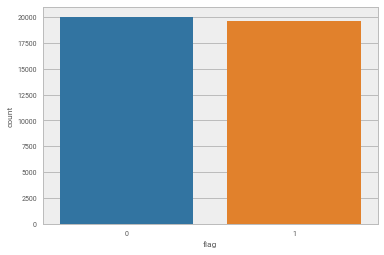

In [15]:
sns.countplot(x='flag', data=df_raw)

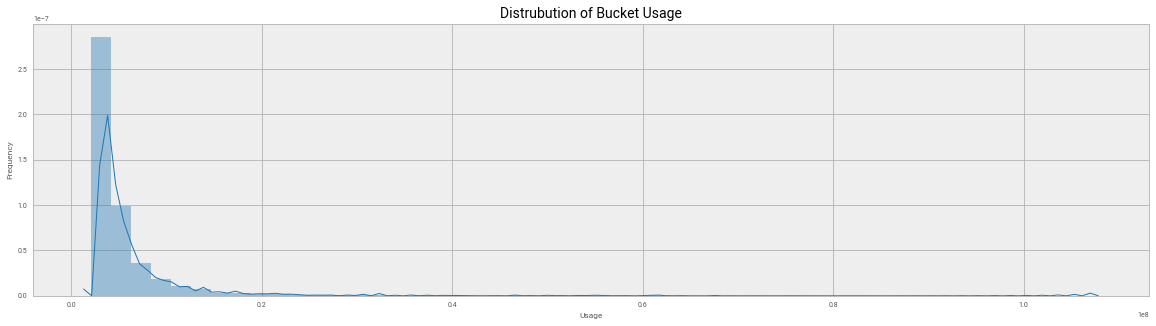

In [16]:
plt.subplots(figsize=(20,5))
sns.distplot(df_raw.bucket_usage)
plt.title('Distrubution of Bucket Usage',fontsize= 14)
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

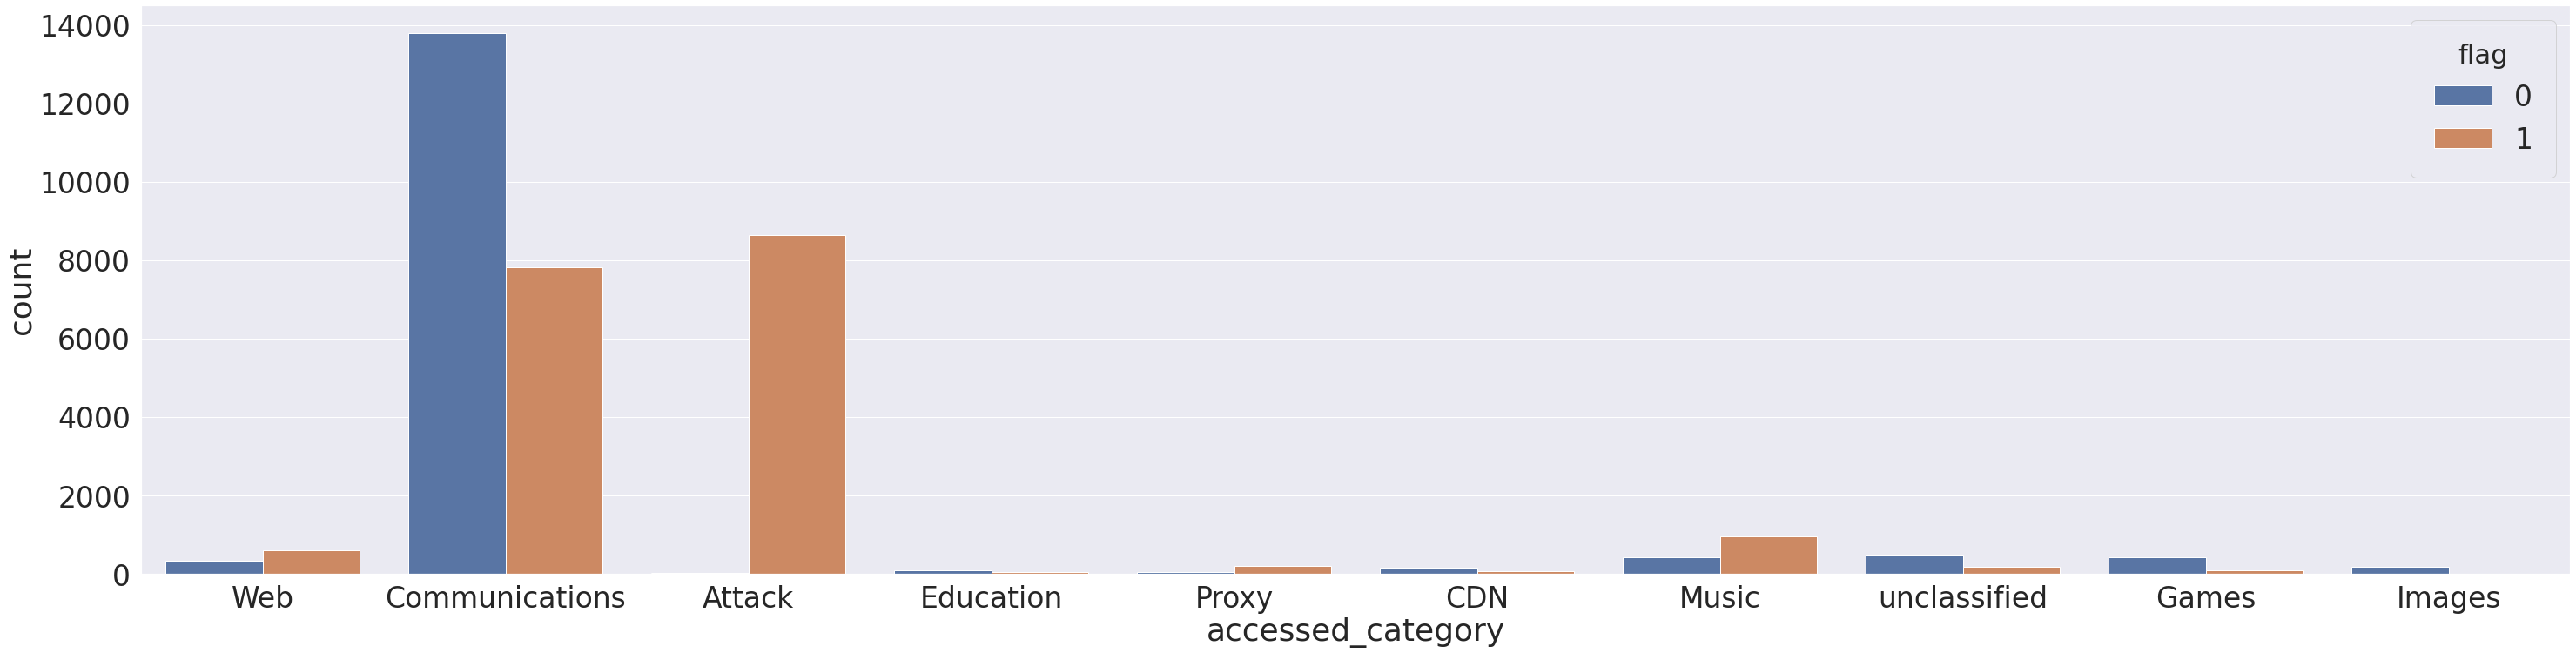

In [17]:
sns.set(font_scale = 3)
plt.subplots(figsize = (50,12))
sns.countplot('accessed_category',hue='flag',data=df_raw[df_raw['accessed_category'].isin(['Web','Communications',
 'Attack', 'Education','Proxy', 'CDN', 'Music', 'unclassified','Games', 'Images',])])

plt.show()

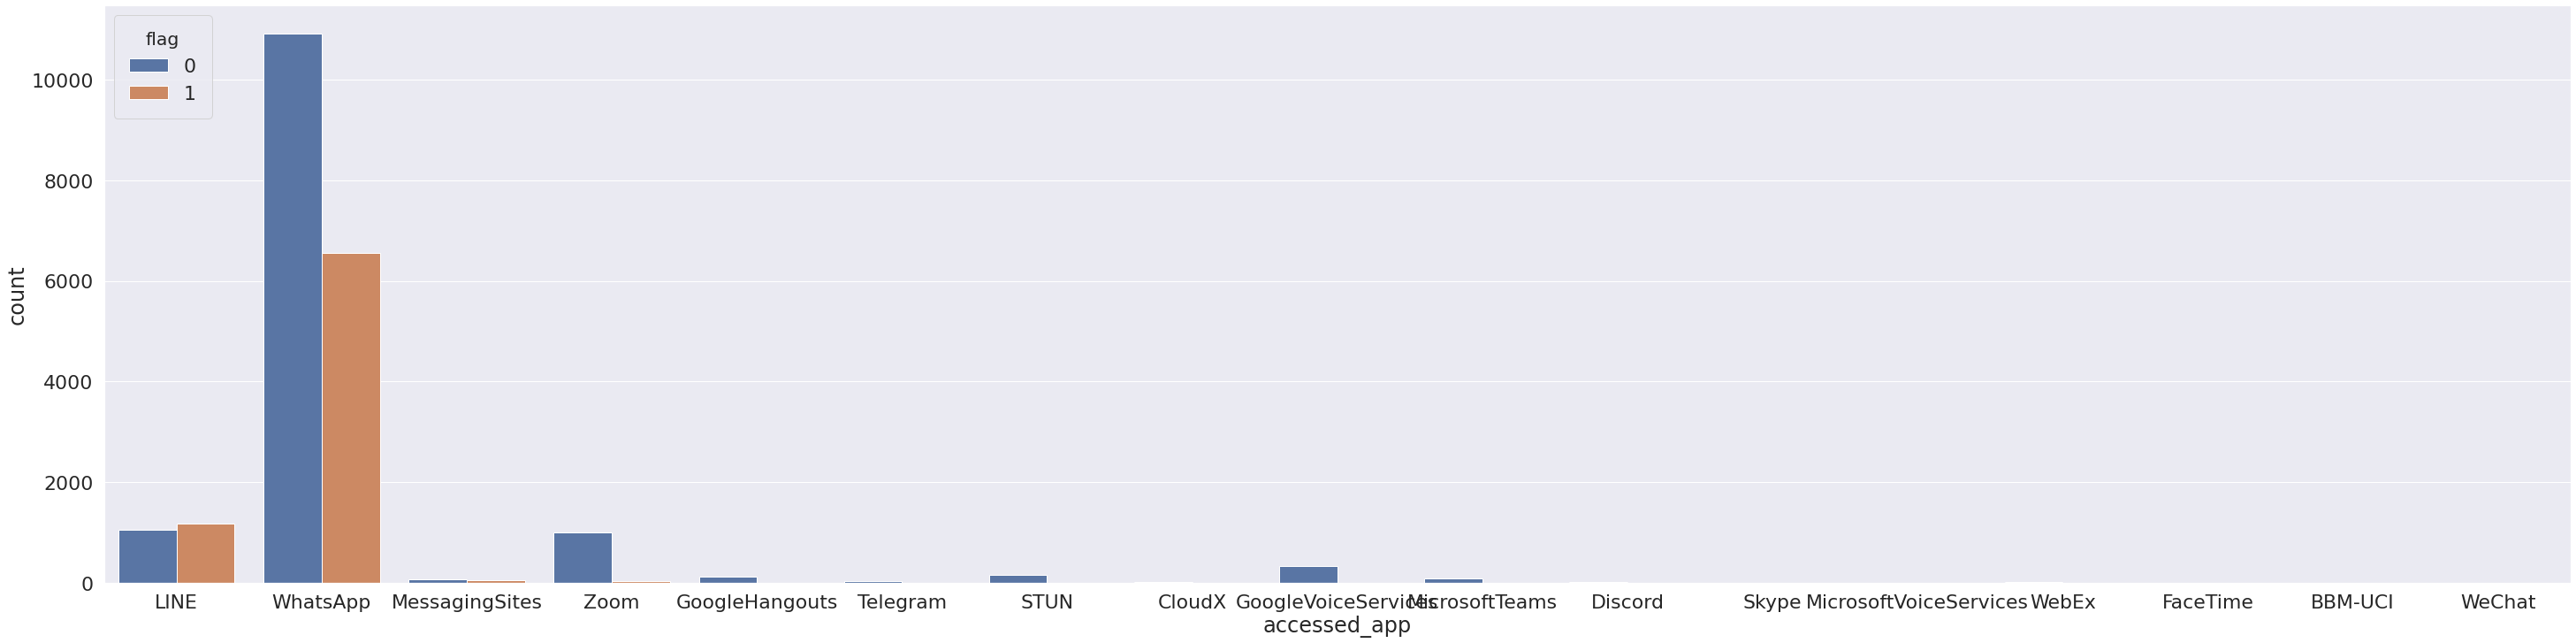

In [18]:
sns.set(font_scale = 2)
plt.subplots(figsize = (50,12))
sns.countplot('accessed_app',hue='flag',data=df_raw[df_raw['accessed_category'].isin(['Communications'])])

plt.show()

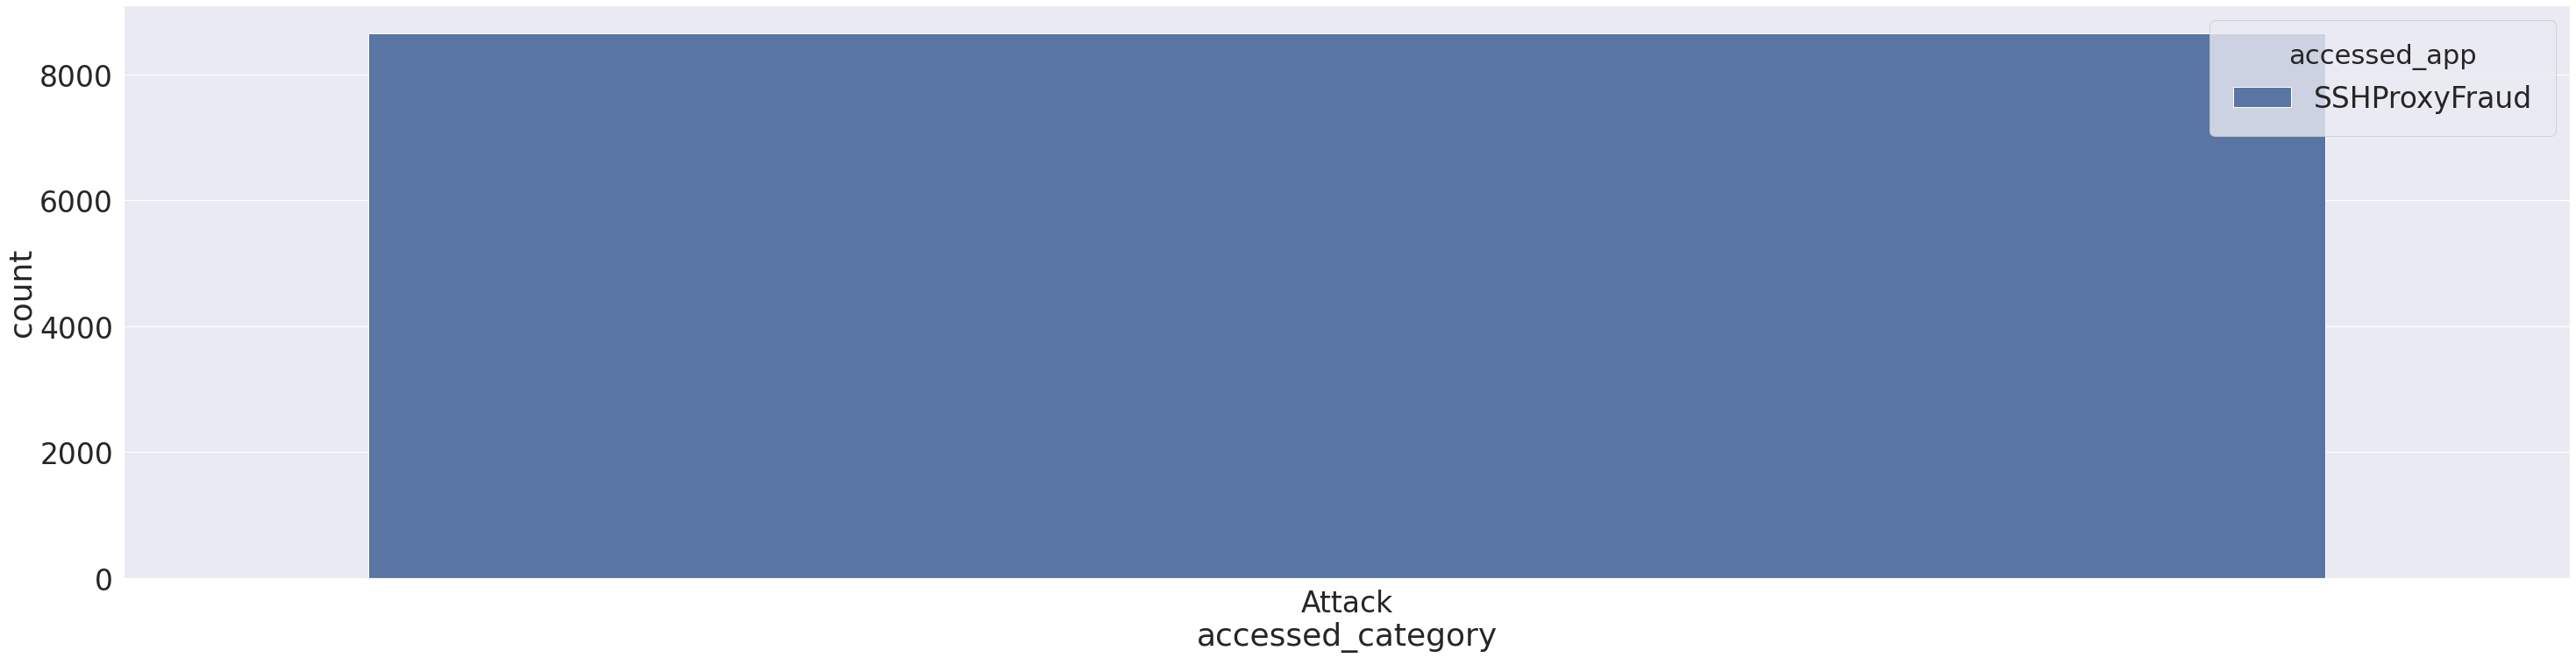

In [19]:
sns.set(font_scale = 3)
plt.subplots(figsize = (50,12))
sns.countplot('accessed_category',hue='accessed_app',data=df_raw[df_raw['accessed_category'].isin(['Attack'])])

plt.show()

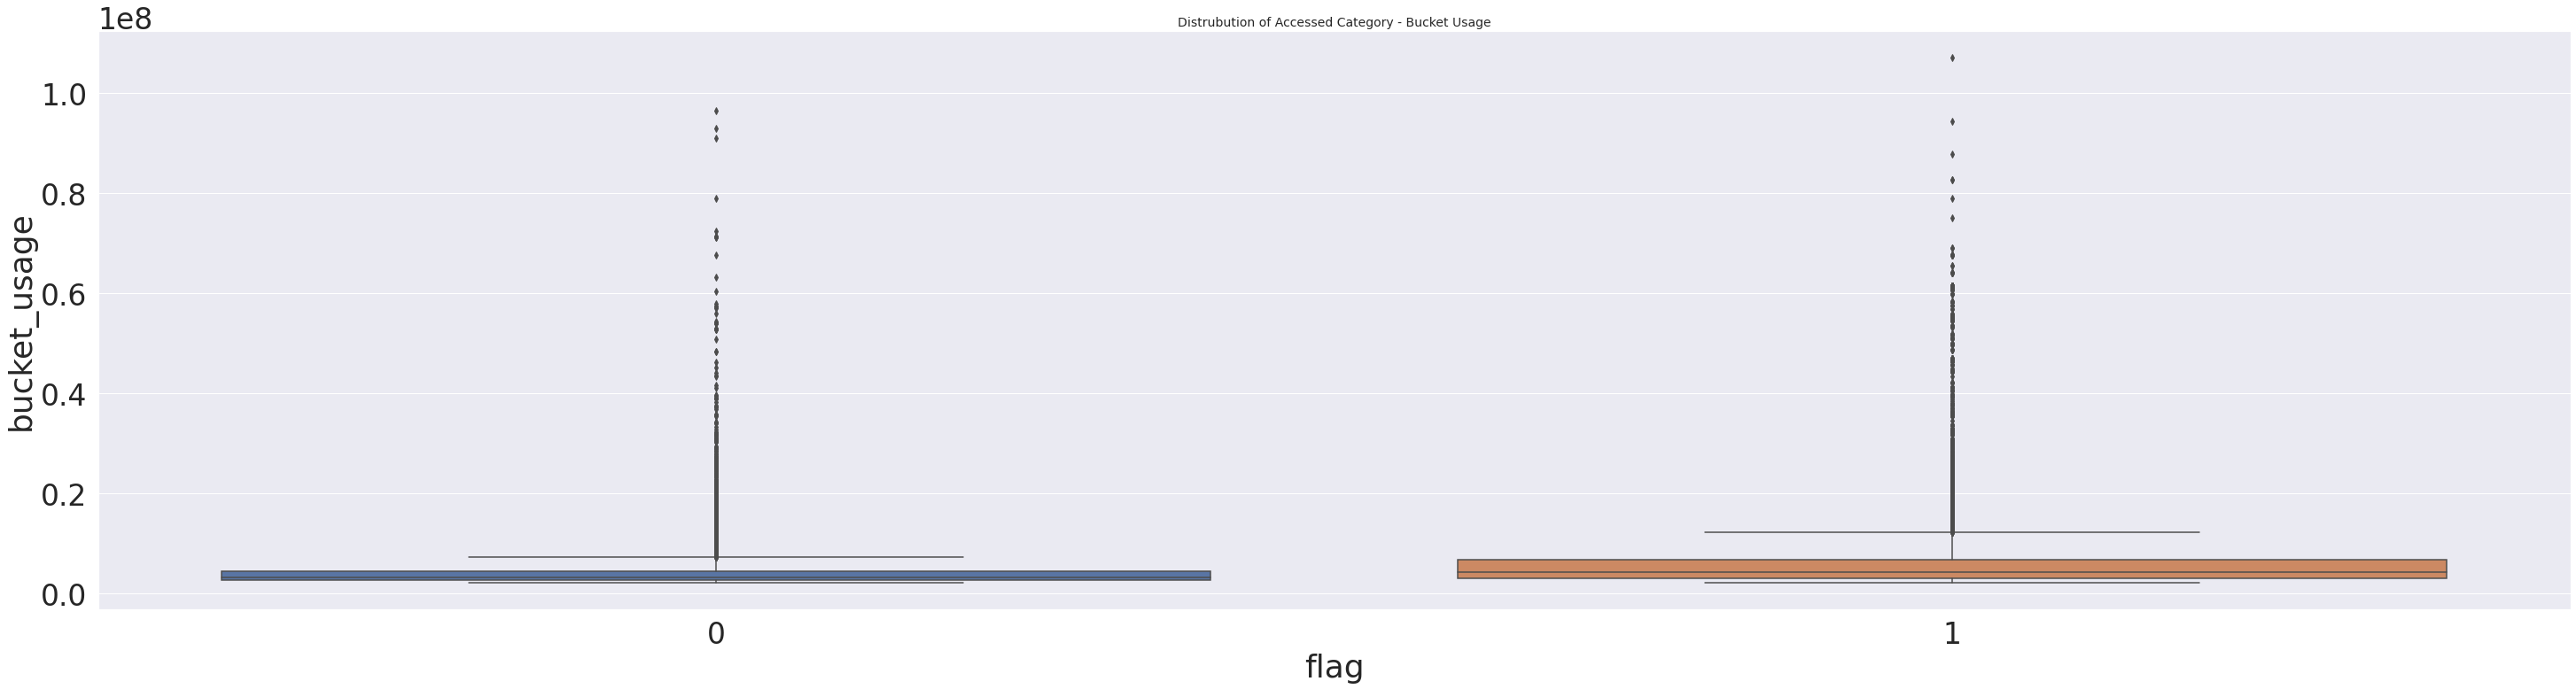

In [20]:
plt.subplots(figsize=(50,12))
sns.boxplot(x="flag", y="bucket_usage", data=df_raw)
plt.title('Distrubution of Accessed Category - Bucket Usage',fontsize= 14)
plt.show()

In [21]:
df_raw = df_raw.drop(['kpi_data_volume_total_bytes','accessed_app','domain','ip_destination','quota_name','profile_name','rat','protocol'], axis=1)

# Data Handling :

In [22]:
df_raw.isnull().sum()

msisdn               0
event_date           0
cgi                  0
accessed_category    0
total_volume_bcp     0
hits_tether          0
rxmit_packets_in     0
rxmit_packets_out    0
packets_in           0
packets_out          0
bucket_usage         0
flag                 0
dtype: int64

In [23]:
df_raw.describe()

,msisdn,cgi,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,flag
count,3.961600e+04,3.961600e+04,3.961600e+04,39616.000000,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,39616.000000
mean,6.072137e+12,5.101002e+14,4.699700e+09,0.467336,6.570232e+04,3.830263e+03,3.381329e+06,1.385075e+06,5.342471e+06,0.495153
std,1.081286e+12,1.269450e+08,5.319595e+09,0.967733,4.050792e+05,3.777444e+04,3.790798e+06,1.939929e+06,5.927359e+06,0.499983
min,6.281110e+10,5.101000e+14,2.147589e+09,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.097155e+06,0.000000
25%,6.281214e+12,5.101001e+14,2.548563e+09,0.000000,2.720000e+02,1.290000e+02,1.833937e+06,6.047585e+05,2.740096e+06,0.000000
50%,6.281218e+12,5.101002e+14,3.199245e+09,0.000000,2.184500e+03,5.020000e+02,2.349933e+06,9.337170e+05,3.635128e+06,0.000000
75%,6.282122e+12,5.101002e+14,4.768379e+09,1.000000,1.253225e+04,1.351000e+03,3.513157e+06,1.506104e+06,5.507788e+06,1.000000
max,6.285400e+12,5.101010e+14,1.550245e+11,15.000000,1.945951e+07,3.907686e+06,1.140361e+08,6.629877e+07,1.070512e+08,1.000000


# Feature Engineering :

In [24]:
df_raw['total_packets'] = df_raw['packets_in']+df_raw['packets_out']
df_raw['total_rxmit'] = df_raw['rxmit_packets_in']+df_raw['rxmit_packets_out']

In [25]:
to_flag_cols = ['bucket_usage', 'total_volume_bcp', 'total_rxmit', 'total_packets']
flag_cols = ['bucket_usage_labels', 'total_volume_bcp_labels', 'total_rxmit_labels', 'total_packets_labels']
for col in to_flag_cols:
    df_raw[col + '_labels'] = (df_raw[col] > df_raw[col].median())
    df_raw[col + '_labels'] = df_raw[col + '_labels'].astype(int) #convert from boolean to integer
df_raw
for col in flag_cols:
    print(col + ' 0 count:', df_raw[col].count()-df_raw[col].sum())
    print(col + ' 1 count:', df_raw[col].sum())

bucket_usage_labels 0 count: 19808
bucket_usage_labels 1 count: 19808
total_volume_bcp_labels 0 count: 19808
total_volume_bcp_labels 1 count: 19808
total_rxmit_labels 0 count: 19809
total_rxmit_labels 1 count: 19807
total_packets_labels 0 count: 19808
total_packets_labels 1 count: 19808


In [26]:
df_raw['event_date']  = pd.to_datetime(df_raw.event_date.astype(str), format='%Y-%m-%d')

df_join = df_raw.copy()
for col in to_flag_cols:
    df_tes = df_join.copy()
    df_tes = df_tes[['msisdn', 'event_date',col +'_labels']]
    df_tes = df_tes.groupby(['msisdn', 'event_date']).max().reset_index()
    
    dummy_date =  df_tes[['event_date']].min() - timedelta(days=7)
    df_date = df_tes[['event_date']].drop_duplicates()
    df_date.iloc[-1]= dummy_date
    df_date.index = df_date.index+1
    dates = df_date.set_index('event_date').resample('D').asfreq().index
    
    msisdn = df_tes['msisdn'].unique()
    
    idx = pd.MultiIndex.from_product((dates, msisdn), names=['event_date', 'msisdn'])
    
    df_tes = df_tes.set_index(['event_date', 'msisdn']).reindex(idx).reset_index().sort_values(by=['event_date', 'msisdn'], ascending=True).reset_index(level=0, drop=True).fillna(0)
    df_tes[col +'_count'] = df_tes.groupby(['msisdn'])[col +'_labels'].rolling(7).sum().reset_index(level=0, drop=True)
    df_tes = df_tes.drop([col +'_labels'],1)
    
    df_join = pd.merge(df_join, df_tes,  how='left', left_on=['msisdn','event_date'], right_on = ['msisdn','event_date'])
df_join


,msisdn,event_date,cgi,accessed_category,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,...,total_packets,total_rxmit,bucket_usage_labels,total_volume_bcp_labels,total_rxmit_labels,total_packets_labels,bucket_usage_count,total_volume_bcp_count,total_rxmit_count,total_packets_count
0,6281210077714,2020-12-01,510100148743021,Web,3633776001,0,430,942,2348290,1665496,...,4013786,1372,0,1,0,1,1.0,1.0,1.0,1.0
1,6281210077714,2020-12-01,510100148743022,Web,7242484799,0,3148,3555,4649069,3960297,...,8609366,6703,1,1,1,1,1.0,1.0,1.0,1.0
2,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,...,3345328,3218,0,0,0,1,3.0,3.0,3.0,3.0
3,6281210077714,2020-12-03,510100148743025,Web,9893298731,0,4578,3600,7250319,3455702,...,10706021,8178,1,1,1,1,3.0,3.0,3.0,3.0
4,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,...,3345328,3218,0,0,0,1,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,6281218494370,2020-12-27,510100115092031,Communications,2580432282,7,2101,384,1859937,516418,...,2376355,2485,1,0,0,0,1.0,0.0,0.0,0.0
39612,6281218494370,2020-12-29,510100115092031,Communications,2355155833,4,1356,549,1683932,488460,...,2172392,1905,1,0,0,0,2.0,0.0,0.0,0.0
39613,6281218494370,2020-12-30,510100115092031,Communications,2379550251,8,1956,415,1707649,452282,...,2159931,2371,1,0,0,0,3.0,0.0,0.0,0.0
39614,6281218494764,2020-12-02,510100145613034,Communications,2626314338,0,546,852,1866256,758556,...,2624812,1398,0,0,0,0,0.0,0.0,0.0,0.0


In [27]:
(df_join.corr()*100)['flag']

msisdn                      19.097403
cgi                          9.215979
total_volume_bcp            15.086714
hits_tether                -10.785175
rxmit_packets_in             5.757597
rxmit_packets_out            3.465614
packets_in                  14.766005
packets_out                  7.221634
bucket_usage                18.377777
flag                       100.000000
total_packets               12.766260
total_rxmit                  5.907435
bucket_usage_labels         20.103933
total_volume_bcp_labels     15.852926
total_rxmit_labels           8.688768
total_packets_labels         8.976593
bucket_usage_count          22.126054
total_volume_bcp_count      20.281798
total_rxmit_count            9.422494
total_packets_count         16.954270
Name: flag, dtype: float64

In [28]:
for col in to_flag_cols:
    df_raw[col + '_labels'] = (df_raw[col] > df_raw[col].mean())
    df_raw[col + '_labels'] = df_raw[col + '_labels'].astype(int) #convert from boolean to integer
df_raw

,msisdn,event_date,cgi,accessed_category,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,flag,total_packets,total_rxmit,bucket_usage_labels,total_volume_bcp_labels,total_rxmit_labels,total_packets_labels
0,6281210077714,2020-12-01,510100148743021,Web,3633776001,0,430,942,2348290,1665496,3516935,1,4013786,1372,0,0,0,0
1,6281210077714,2020-12-01,510100148743022,Web,7242484799,0,3148,3555,4649069,3960297,6907476,1,8609366,6703,1,1,0,1
2,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,3072001,1,3345328,3218,0,0,0,0
3,6281210077714,2020-12-03,510100148743025,Web,9893298731,0,4578,3600,7250319,3455702,10827474,1,10706021,8178,1,1,0,1
4,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,3072001,1,3345328,3218,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,6281218494370,2020-12-27,510100115092031,Communications,2580432282,7,2101,384,1859937,516418,4718256,0,2376355,2485,0,0,0,0
39612,6281218494370,2020-12-29,510100115092031,Communications,2355155833,4,1356,549,1683932,488460,5793288,0,2172392,1905,1,0,0,0
39613,6281218494370,2020-12-30,510100115092031,Communications,2379550251,8,1956,415,1707649,452282,5863239,0,2159931,2371,1,0,0,0
39614,6281218494764,2020-12-02,510100145613034,Communications,2626314338,0,546,852,1866256,758556,2520314,0,2624812,1398,0,0,0,0


In [29]:
df_raw['bucket_usage_count'] =df_raw.groupby(['msisdn', 'accessed_category', 'event_date'])['bucket_usage_labels'].transform('sum')
df_raw['total_volume_bcp_count'] =df_raw.groupby(['msisdn', 'accessed_category', 'event_date'])['total_volume_bcp_labels'].transform('sum')
df_raw['total_rxmit_count'] =df_raw.groupby(['msisdn', 'accessed_category', 'event_date'])['total_rxmit_labels'].transform('sum')
df_raw['total_packets_count'] =df_raw.groupby(['msisdn', 'accessed_category', 'event_date'])['total_packets_labels'].transform('sum')

df_raw

,msisdn,event_date,cgi,accessed_category,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,...,total_packets,total_rxmit,bucket_usage_labels,total_volume_bcp_labels,total_rxmit_labels,total_packets_labels,bucket_usage_count,total_volume_bcp_count,total_rxmit_count,total_packets_count
0,6281210077714,2020-12-01,510100148743021,Web,3633776001,0,430,942,2348290,1665496,...,4013786,1372,0,0,0,0,1,1,0,1
1,6281210077714,2020-12-01,510100148743022,Web,7242484799,0,3148,3555,4649069,3960297,...,8609366,6703,1,1,0,1,1,1,0,1
2,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,...,3345328,3218,0,0,0,0,8,8,0,8
3,6281210077714,2020-12-03,510100148743025,Web,9893298731,0,4578,3600,7250319,3455702,...,10706021,8178,1,1,0,1,8,8,0,8
4,6281210077714,2020-12-03,510100148743021,Web,3185885366,0,1895,1323,2509610,835718,...,3345328,3218,0,0,0,0,8,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,6281218494370,2020-12-27,510100115092031,Communications,2580432282,7,2101,384,1859937,516418,...,2376355,2485,0,0,0,0,0,0,0,0
39612,6281218494370,2020-12-29,510100115092031,Communications,2355155833,4,1356,549,1683932,488460,...,2172392,1905,1,0,0,0,1,0,0,0
39613,6281218494370,2020-12-30,510100115092031,Communications,2379550251,8,1956,415,1707649,452282,...,2159931,2371,1,0,0,0,1,0,0,0
39614,6281218494764,2020-12-02,510100145613034,Communications,2626314338,0,546,852,1866256,758556,...,2624812,1398,0,0,0,0,0,0,0,0


In [16]:
df_raw.head()

,msisdn,event_date,cgi,rat,profile_name,quota_name,protocol,domain,ip_destination,accessed_category,...,bucket_usage_labels,total_volume_bcp_labels,total_packets,total_rxmit,total_rxmit_labels,total_packets_labels,bucket_usage_count,total_volume_bcp_count,total_rxmit_count,total_packets_count
0,6281210077714,2020-12-01,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,...,0,0,4013786,1372,0,0,1,1,0,1
1,6281210077714,2020-12-01,510100148743022,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,51.79.146.228,Web,...,1,1,8609366,6703,0,1,1,1,0,1
2,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,...,0,0,3345328,3218,0,0,8,8,0,8
3,6281210077714,2020-12-03,510100148743025,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,103.65.237.39,Web,...,1,1,10706021,8178,0,1,8,8,0,8
4,6281210077714,2020-12-03,510100148743021,4G,ULDPI_B2C_Redflag1_Std,Q_ULDPI_B2C_Redflag1_Std,HTTP,http://line.me,111.221.45.20,Web,...,0,0,3345328,3218,0,0,8,8,0,8


In [107]:
df_raw.to_csv('dpi_median_filter.csv', index=False)

# One Hot Encoding for Categorical Features :

In [108]:
#One Hot Encoding :

import category_encoders as ce

df_enc=pd.DataFrame({'accessed_category':['Web', 'Communications', 'Attack', 'Education', 'Proxy', 'CDN', 'Music', 'unclassified', 'Games', 'Images', 'GoogleServices', 'Enterprise', 'ApplicationStore', 'Technology', 'Productivity', 'VPN', 'Net', 'non-established', 'Remote', 'Mail', 'Finance', 'News', 'Media', 'DeviceServices', 'Telco', 'CloudServices', 'P2P', 'CloudStorage', 'Lifestyle', 'Ads', 'WebApps', 'FileSharing', 'Sports', 'Backup', 'AppleServices', 'eCommerce', 'Update', 'Automotive']})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='accessed_category',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
df_enc

,accessed_category
0,Web
1,Communications
2,Attack
3,Education
4,Proxy
5,CDN
6,Music
7,unclassified
8,Games
9,Images


In [109]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df_enc)
data_encoded

,accessed_category_Web,accessed_category_Communications,accessed_category_Attack,accessed_category_Education,accessed_category_Proxy,accessed_category_CDN,accessed_category_Music,accessed_category_unclassified,accessed_category_Games,accessed_category_Images,...,accessed_category_Lifestyle,accessed_category_Ads,accessed_category_WebApps,accessed_category_FileSharing,accessed_category_Sports,accessed_category_Backup,accessed_category_AppleServices,accessed_category_eCommerce,accessed_category_Update,accessed_category_Automotive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
one_hot = pd.get_dummies(df_raw['accessed_category'])

df_raw = df_raw.drop('accessed_category',axis = 1)
df_raw = df_raw.join(one_hot)
df_raw

,msisdn,event_date,cgi,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,...,Sports,Technology,Telco,Update,VPN,Web,WebApps,eCommerce,non-established,unclassified
0,6281210077714,2020-12-01,510100148743021,3633776001,0,430,942,2348290,1665496,3516935,...,0,0,0,0,0,1,0,0,0,0
1,6281210077714,2020-12-01,510100148743022,7242484799,0,3148,3555,4649069,3960297,6907476,...,0,0,0,0,0,1,0,0,0,0
2,6281210077714,2020-12-03,510100148743021,3185885366,0,1895,1323,2509610,835718,3072001,...,0,0,0,0,0,1,0,0,0,0
3,6281210077714,2020-12-03,510100148743025,9893298731,0,4578,3600,7250319,3455702,10827474,...,0,0,0,0,0,1,0,0,0,0
4,6281210077714,2020-12-03,510100148743021,3185885366,0,1895,1323,2509610,835718,3072001,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,6281218494370,2020-12-27,510100115092031,2580432282,7,2101,384,1859937,516418,4718256,...,0,0,0,0,0,0,0,0,0,0
39612,6281218494370,2020-12-29,510100115092031,2355155833,4,1356,549,1683932,488460,5793288,...,0,0,0,0,0,0,0,0,0,0
39613,6281218494370,2020-12-30,510100115092031,2379550251,8,1956,415,1707649,452282,5863239,...,0,0,0,0,0,0,0,0,0,0
39614,6281218494764,2020-12-02,510100145613034,2626314338,0,546,852,1866256,758556,2520314,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_raw = df_raw.drop('accessed_category',axis = 1)
df_raw = df_raw.join(data_encoded)
df_raw

In [111]:
df_raw.corr()['flag']*100

msisdn                      19.097403
cgi                          9.215979
total_volume_bcp            15.086714
hits_tether                -10.785175
rxmit_packets_in             5.757597
rxmit_packets_out            3.465614
packets_in                  14.766005
packets_out                  7.221634
bucket_usage                18.377777
flag                       100.000000
total_packets               12.766260
total_rxmit                  5.907435
total_packets_labels        13.858392
total_rxmit_labels           7.816570
total_volume_bcp_labels     18.846823
bucket_usage_labels         21.273919
bucket_usage_count          27.350168
total_volume_bcp_count      22.015912
total_rxmit_count           16.206675
total_packets_count         21.328097
Ads                         -2.934178
AppleServices               -1.492882
ApplicationStore             0.580375
Attack                      53.207010
Automotive                  -0.497577
Backup                      -5.436028
CDN         

In [112]:
df_raw.to_csv('dpi_onehont_median.csv', index=False)

# Learning

In [113]:
df_tes = pd.read_csv('dpi_onehont_median.csv')
df_learn = df_tes.copy()

In [114]:
df_learn.flag.value_counts()

0    20000
1    19616
Name: flag, dtype: int64

<AxesSubplot:xlabel='flag', ylabel='count'>

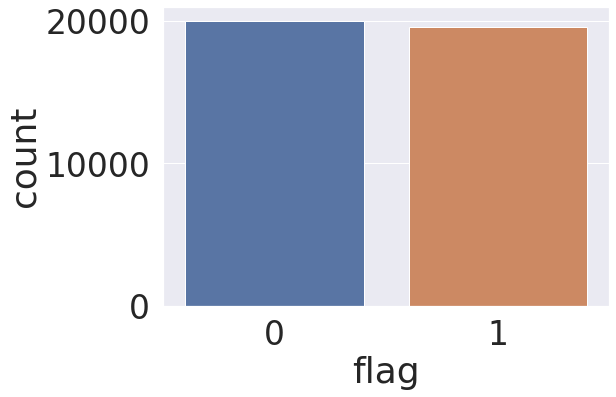

In [115]:
sns.countplot(x='flag', data=df_learn)

In [116]:
df_learn.columns

Index(['msisdn', 'event_date', 'cgi', 'total_volume_bcp', 'hits_tether',
       'rxmit_packets_in', 'rxmit_packets_out', 'packets_in', 'packets_out',
       'bucket_usage', 'flag', 'total_packets', 'total_rxmit',
       'total_packets_labels', 'total_rxmit_labels', 'total_volume_bcp_labels',
       'bucket_usage_labels', 'bucket_usage_count', 'total_volume_bcp_count',
       'total_rxmit_count', 'total_packets_count', 'Ads', 'AppleServices',
       'ApplicationStore', 'Attack', 'Automotive', 'Backup', 'CDN',
       'CloudServices', 'CloudStorage', 'Communications', 'DeviceServices',
       'Education', 'Enterprise', 'FileSharing', 'Finance', 'Games',
       'GoogleServices', 'Images', 'Lifestyle', 'Mail', 'Media', 'Music',
       'Net', 'News', 'P2P', 'Productivity', 'Proxy', 'Remote', 'Sports',
       'Technology', 'Telco', 'Update', 'VPN', 'Web', 'WebApps', 'eCommerce',
       'non-established', 'unclassified'],
      dtype='object')

In [117]:
input_cols = ['total_volume_bcp', 'hits_tether',
       'rxmit_packets_in', 'rxmit_packets_out', 'packets_in', 'packets_out',
       'bucket_usage', 'total_packets', 'total_rxmit',
       'total_packets_labels', 'total_rxmit_labels', 'total_volume_bcp_labels',
       'bucket_usage_labels', 'bucket_usage_count', 'total_volume_bcp_count',
       'total_rxmit_count', 'total_packets_count', 'Ads', 'AppleServices',
       'ApplicationStore', 'Attack', 'Automotive', 'Backup', 'CDN',
       'CloudServices', 'CloudStorage', 'Communications', 'DeviceServices',
       'Education', 'Enterprise', 'FileSharing', 'Finance', 'Games',
       'GoogleServices', 'Images', 'Lifestyle', 'Mail', 'Media', 'Music',
       'Net', 'News', 'P2P', 'Productivity', 'Proxy', 'Remote', 'Sports',
       'Technology', 'Telco', 'Update', 'VPN', 'Web', 'WebApps', 'eCommerce',
       'non-established', 'unclassified']
        
output_cols = 'flag'
df_learn = df_learn[input_cols + [output_cols,] ].dropna()
df_learn

,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,total_packets,total_rxmit,total_packets_labels,...,Technology,Telco,Update,VPN,Web,WebApps,eCommerce,non-established,unclassified,flag
0,3633776001,0,430,942,2348290,1665496,3516935,4013786,1372,0,...,0,0,0,0,1,0,0,0,0,1
1,7242484799,0,3148,3555,4649069,3960297,6907476,8609366,6703,1,...,0,0,0,0,1,0,0,0,0,1
2,3185885366,0,1895,1323,2509610,835718,3072001,3345328,3218,0,...,0,0,0,0,1,0,0,0,0,1
3,9893298731,0,4578,3600,7250319,3455702,10827474,10706021,8178,1,...,0,0,0,0,1,0,0,0,0,1
4,3185885366,0,1895,1323,2509610,835718,3072001,3345328,3218,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39611,2580432282,7,2101,384,1859937,516418,4718256,2376355,2485,0,...,0,0,0,0,0,0,0,0,0,0
39612,2355155833,4,1356,549,1683932,488460,5793288,2172392,1905,0,...,0,0,0,0,0,0,0,0,0,0
39613,2379550251,8,1956,415,1707649,452282,5863239,2159931,2371,0,...,0,0,0,0,0,0,0,0,0,0
39614,2626314338,0,546,852,1866256,758556,2520314,2624812,1398,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df_learn.describe()

,total_volume_bcp,hits_tether,rxmit_packets_in,rxmit_packets_out,packets_in,packets_out,bucket_usage,total_packets,total_rxmit,total_packets_labels,...,Technology,Telco,Update,VPN,Web,WebApps,eCommerce,non-established,unclassified,flag
count,3.961600e+04,39616.000000,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,3.961600e+04,39616.000000,...,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000,39616.000000
mean,4.699700e+09,0.467336,6.570232e+04,3.830263e+03,3.381329e+06,1.385075e+06,5.342471e+06,4.766403e+06,6.953258e+04,0.261839,...,0.001843,0.000177,0.001085,0.014615,0.023349,0.000227,0.000076,0.001313,0.016231,0.495153
std,5.319595e+09,0.967733,4.050792e+05,3.777444e+04,3.790798e+06,1.939929e+06,5.927359e+06,5.481982e+06,4.169651e+05,0.439641,...,0.042888,0.013292,0.032928,0.120009,0.151012,0.015071,0.008702,0.036207,0.126364,0.499983
min,2.147589e+09,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.097155e+06,1.580525e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.548563e+09,0.000000,2.720000e+02,1.290000e+02,1.833937e+06,6.047585e+05,2.740096e+06,2.583495e+06,7.040000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.199245e+09,0.000000,2.184500e+03,5.020000e+02,2.349933e+06,9.337170e+05,3.635128e+06,3.341969e+06,3.316000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.768379e+09,1.000000,1.253225e+04,1.351000e+03,3.513157e+06,1.506104e+06,5.507788e+06,4.889647e+06,1.454000e+04,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.550245e+11,15.000000,1.945951e+07,3.907686e+06,1.140361e+08,6.629877e+07,1.070512e+08,1.601625e+08,1.946212e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
X = df_learn.drop(output_cols, axis=1)
y = df_learn[output_cols]

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(len(X_train), len(X_test))

31692 7924


# Trial 1 : Decission Tree Classifier :

In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3331  693]
 [ 487 3413]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4024
           1       0.83      0.88      0.85      3900

    accuracy                           0.85      7924
   macro avg       0.85      0.85      0.85      7924
weighted avg       0.85      0.85      0.85      7924



# Trial 2 - Random Forest Classifier :

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
y_pred = rfc.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3818  206]
 [ 601 3299]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4024
           1       0.94      0.85      0.89      3900

    accuracy                           0.90      7924
   macro avg       0.90      0.90      0.90      7924
weighted avg       0.90      0.90      0.90      7924



# Trial 3 - Extra Tree Classifier :

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [128]:
y_pred = etc.predict(X_test)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3853  171]
 [ 617 3283]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4024
           1       0.95      0.84      0.89      3900

    accuracy                           0.90      7924
   macro avg       0.91      0.90      0.90      7924
weighted avg       0.91      0.90      0.90      7924



In [130]:
# Add Flag Column :

In [132]:
#y_pred = pd.DataFrame(y_pred, columns=['flag_P1']).to_csv('DPI_Pred_1.csv')

# Cek :

In [56]:
# y_pred_new = rfc.predict(df_learn.drop(output_cols, axis=1))

In [57]:
# df_learn['Prediction'] = y_pred_new
# df_learn.head()

# Saving Model (Bisa di Skip - Terakhir aja) :

In [58]:
# joblib.dump(regressor, "regressor.sav")

In [59]:
# pd.DataFrame(X_train.columns).to_csv("feature_list.csv", index = None)

In [60]:
# pd.DataFrame(X_train.dtypes).reset_index().to_csv("data_types.csv", index = None)

In [61]:
# feature_list = pd.read_csv("feature_list.csv")
# feature_list = pd.Index(list(feature_list["0"]))

# add_cols = list(feature_list.difference(X_test.columns))

# drop_cols = list(X_test.columns.difference(feature_list))

# for col in add_cols:
    # X_test[col] = np.nan

# for col in drop_cols:
    # X_test = X_test.drop(col, axis = 1)

# reorder columns
# X_test = X_test[feature_list]

# types = pd.read_csv("data_types.csv")
# for i in range(len(types)):
    # X_test[types.iloc[i,0]] = X_test[types.iloc[i,0]].astype(types.iloc[i,1])

In [62]:
# regressor = joblib.load("regressor.sav")
# predictions = regressor.predict(X_test)

In [63]:
# res = pd.DataFrame(predictions)
# res.index = X_test.index # its important for comparison
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv")

# Feature Importance :

In [133]:
for i,j in enumerate(classifier.feature_importances_):
    print(df_learn.columns[i],'\t\t', j*100)

total_volume_bcp 		 4.920672380364861
hits_tether 		 1.163211241066224
rxmit_packets_in 		 4.89837207500511
rxmit_packets_out 		 10.117532790537034
packets_in 		 4.815838821074999
packets_out 		 7.022338492280186
bucket_usage 		 7.4956285260632525
total_packets 		 4.553637700622802
total_rxmit 		 4.37549408877968
total_packets_labels 		 0.015667191930680446
total_rxmit_labels 		 0.06497851736664081
total_volume_bcp_labels 		 0.02103721884685006
bucket_usage_labels 		 0.03688525704481044
bucket_usage_count 		 12.280420323763956
total_volume_bcp_count 		 2.9736814893822667
total_rxmit_count 		 1.3361425431618088
total_packets_count 		 0.5847632760272624
Ads 		 0.010518609423425031
AppleServices 		 0.0
ApplicationStore 		 0.09668359144694572
Attack 		 28.295332118672462
Automotive 		 0.0
Backup 		 0.00994231400447776
CDN 		 0.050790069532656
CloudServices 		 0.07406036021595529
CloudStorage 		 0.018620547774390015
Communications 		 0.4603470614149759
DeviceServices 		 0.0
Education 		 0.0

# SHAP :

In [ ]:
import shap

In [ ]:
# DF, based on which importance is checked
X_importance = X_train

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(etc)
shap_values = explainer.shap_values(X_importance)

In [ ]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainer = shap.TreeExplainer(etc)
    shap_values_Model = explainer.shap_values(S)
    p = shap.force_plot(explainer.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

# Trial 2 - PyCaret :

In [68]:
pip install pycaret

Looking in indexes: https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-remote/simple, https://cicd-jfrog.telkomsel.co.id/artifactory/api/pypi/tsel-python-local/simple


You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
from pycaret.classification import *

In [70]:
df_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39615
Data columns (total 56 columns):
total_volume_bcp           39616 non-null int64
hits_tether                39616 non-null int64
rxmit_packets_in           39616 non-null int64
rxmit_packets_out          39616 non-null int64
packets_in                 39616 non-null int64
packets_out                39616 non-null int64
bucket_usage               39616 non-null int64
total_packets              39616 non-null int64
total_rxmit                39616 non-null int64
total_packets_labels       39616 non-null int64
total_rxmit_labels         39616 non-null int64
total_volume_bcp_labels    39616 non-null int64
bucket_usage_labels        39616 non-null int64
bucket_usage_count         39616 non-null int64
total_volume_bcp_count     39616 non-null int64
total_rxmit_count          39616 non-null int64
total_packets_count        39616 non-null int64
Ads                        39616 non-null int64
AppleServices              

In [71]:
df_learn.columns

Index(['total_volume_bcp', 'hits_tether', 'rxmit_packets_in',
       'rxmit_packets_out', 'packets_in', 'packets_out', 'bucket_usage',
       'total_packets', 'total_rxmit', 'total_packets_labels',
       'total_rxmit_labels', 'total_volume_bcp_labels', 'bucket_usage_labels',
       'bucket_usage_count', 'total_volume_bcp_count', 'total_rxmit_count',
       'total_packets_count', 'Ads', 'AppleServices', 'ApplicationStore',
       'Attack', 'Automotive', 'Backup', 'CDN', 'CloudServices',
       'CloudStorage', 'Communications', 'DeviceServices', 'Education',
       'Enterprise', 'FileSharing', 'Finance', 'Games', 'GoogleServices',
       'Images', 'Lifestyle', 'Mail', 'Media', 'Music', 'Net', 'News', 'P2P',
       'Productivity', 'Proxy', 'Remote', 'Sports', 'Technology', 'Telco',
       'Update', 'VPN', 'Web', 'WebApps', 'eCommerce', 'non-established',
       'unclassified', 'flag'],
      dtype='object')

In [72]:
clf1 = setup(data = df_tes, 
             target = 'flag',
             numeric_imputation = 'mean',
             categorical_features = ['total_packets_labels','total_rxmit_labels', 'total_volume_bcp_labels', 'bucket_usage_labels','Ads', 'AppleServices', 'ApplicationStore','Attack', 'Automotive', 'Backup', 'CDN', 'CloudServices','CloudStorage', 'Communications', 'DeviceServices', 'Education','Enterprise', 'FileSharing', 'Finance', 'Games', 'GoogleServices','Images', 'Lifestyle', 'Mail', 'Media', 'Music', 'Net', 'News', 'P2P','Productivity', 'Proxy', 'Remote', 'Sports', 'Technology', 'Telco', 'Update', 'VPN', 'Web', 'WebApps', 'eCommerce', 'non-established','unclassified'], 
             ignore_features = ['msisdn', 'event_date', 'cgi'],
             silent = True)

,Description,Value
0,session_id,7623
1,Target,flag
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(39616, 59)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,43
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8904,0.9461,0.8329,0.9401,0.8832,0.7808,0.7859,0.298
et,Extra Trees Classifier,0.8902,0.9445,0.829,0.9435,0.8825,0.7803,0.7861,0.281
xgboost,Extreme Gradient Boosting,0.8613,0.9344,0.79,0.9198,0.8499,0.7224,0.7297,38.94
catboost,CatBoost Classifier,0.8595,0.9346,0.7799,0.9261,0.8467,0.7188,0.7279,8.046
lightgbm,Light Gradient Boosting Machine,0.852,0.9305,0.7581,0.9317,0.8359,0.7037,0.7162,0.259
dt,Decision Tree Classifier,0.8392,0.8393,0.8597,0.8246,0.8418,0.6785,0.6792,0.358
gbc,Gradient Boosting Classifier,0.8334,0.9139,0.7083,0.9425,0.8087,0.6664,0.6878,0.998
ada,Ada Boost Classifier,0.8263,0.9034,0.7027,0.9313,0.8008,0.6521,0.6726,0.24
lda,Linear Discriminant Analysis,0.7766,0.8624,0.623,0.8962,0.735,0.5525,0.5799,0.086
ridge,Ridge Classifier,0.691,0,0.5095,0.7868,0.6175,0.3808,0.4049,0.038


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7623, verbose=0,
                       warm_start=False)

In [74]:
et = create_model ('et')    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,0.9512,0.8457,0.9366,0.8888,0.7894,0.7931
1,0.899,0.9532,0.8441,0.9471,0.8926,0.7979,0.8026
2,0.8828,0.941,0.8216,0.9348,0.8746,0.7654,0.7711
3,0.8842,0.9424,0.8129,0.9468,0.8748,0.7683,0.776
4,0.8933,0.942,0.8325,0.9464,0.8858,0.7864,0.7921
5,0.8922,0.9452,0.8383,0.9383,0.8855,0.7842,0.7887
6,0.8868,0.9377,0.818,0.9471,0.8778,0.7734,0.7806
7,0.8832,0.9385,0.8144,0.9429,0.8739,0.7661,0.7733
8,0.8936,0.9486,0.8304,0.9495,0.886,0.7871,0.7933
9,0.8925,0.9449,0.8319,0.9456,0.8851,0.7849,0.7906


In [75]:
# tuned_et = tune_model (et)

IntProgress(value=0, description='Processing: ', max=5)

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'memory', 'steps', 'verbose', 'empty_step', 'actual_estimator', 'actual_estimator__bootstrap', 'actual_estimator__ccp_alpha', 'actual_estimator__class_weight', 'actual_estimator__criterion', 'actual_estimator__max_depth', 'actual_estimator__max_features', 'actual_estimator__max_leaf_nodes', 'actual_estimator__max_samples', 'actual_estimator__min_impurity_decrease', 'actual_estimator__min_impurity_split', 'actual_estimator__min_samples_leaf', 'actual_estimator__min_samples_split', 'actual_estimator__min_weight_fraction_leaf', 'actual_estimator__n_estimators', 'actual_estimator__n_jobs', 'actual_estimator__oob_score', 'actual_estimator__random_state', 'actual_estimator__verbose', 'actual_estimator__warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


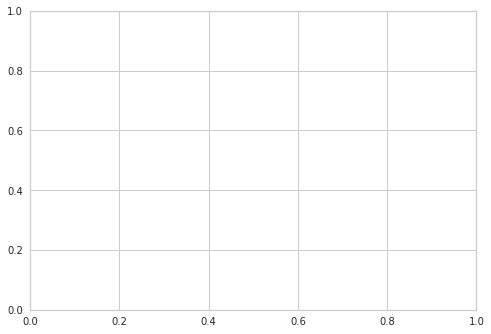

In [76]:
plot_model(estimator = et, plot = 'learning')

In [ ]:
plot_model(estimator = et, plot = 'auc')

In [ ]:
plot_model(estimator = et, plot = 'confusion_matrix')

In [ ]:
plot_model(estimator = et, plot = 'feature')

In [ ]:
evaluate_model(et)

In [ ]:
interpret_model(et)

In [ ]:
predict_model(et, data=df_learn)

In [ ]:
predictions = predict_model(et, data=df_learn)
predictions.head()

In [ ]:
df_learn['flag'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

In [ ]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()